# Diagnosing MAGICC's TCR and ECS

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
from pymagicc.api import MAGICC6, MAGICC7

In [3]:
# simplest and fastest option
with MAGICC6() as magicc: 
    tcrecs = magicc.diagnose_tcr_ecs()
print("TCR is {tcr:.4f}K and ECS is {ecs:.4f}K".format(**tcrecs))

TCR is 1.9734K and ECS is 2.9968K


In [4]:
# get full results
with MAGICC6() as magicc: 
    tcrecs_run = magicc.diagnose_tcr_ecs(full_results=True)

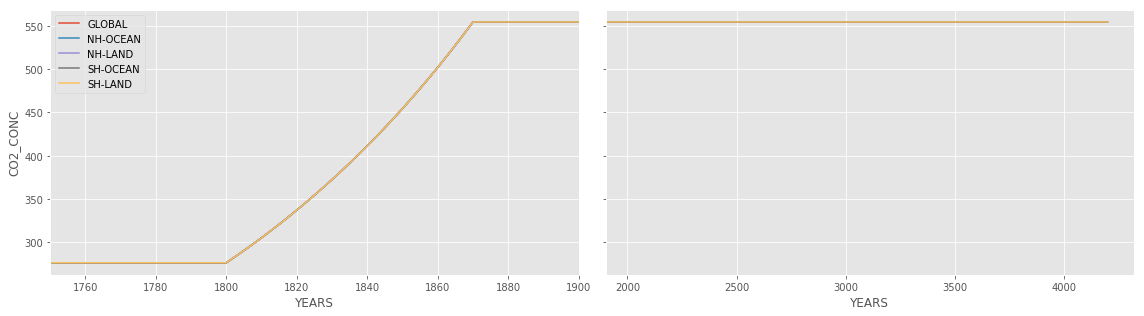

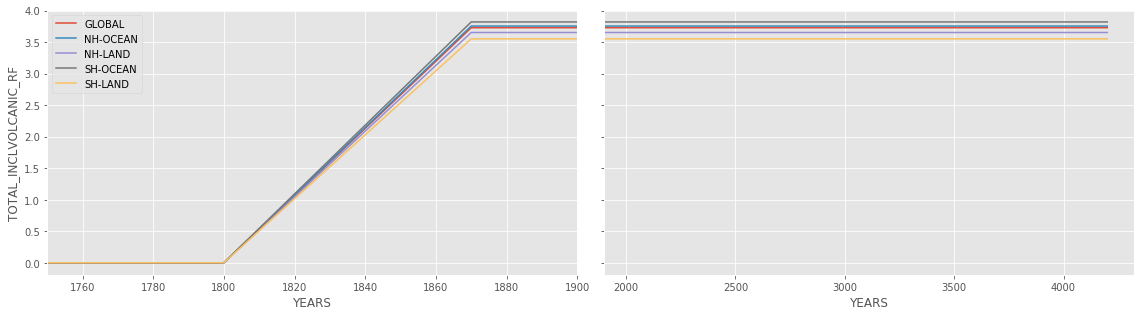

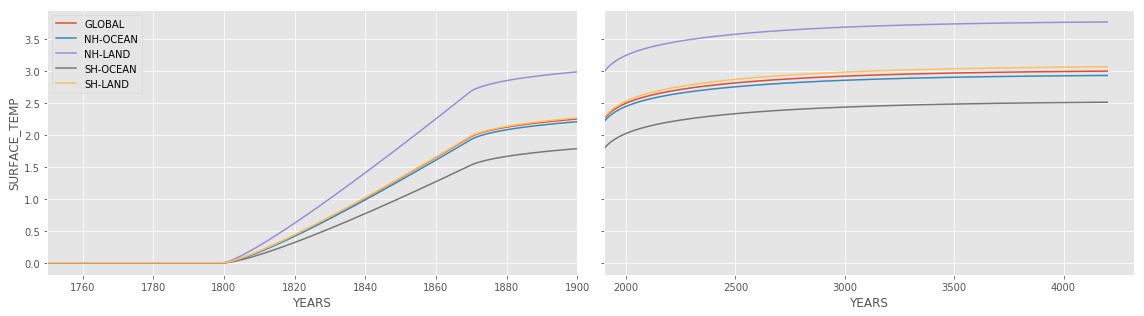

In [5]:
# make a plot to see what is going on (should we move this into the API?)
plt.rcParams['figure.figsize'] = 16, 4.5
join_year = 1900
for key in ['CO2_CONC', 'TOTAL_INCLVOLCANIC_RF', 'SURFACE_TEMP']:
    fig, axes = plt.subplots(1, 2, sharey=True)
    tcrecs_run[key].plot(ax=axes[0])
    axes[0].set_xlim([1750, join_year])
    axes[0].set_ylabel(key)
    tcrecs_run[key].plot(ax=axes[1])
    axes[1].set_xlim(left=join_year)
    axes[1].legend_.remove()
    fig.tight_layout()